# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [267]:
# write your code here
df = pd.read_csv('5_a.csv')

In [144]:
df.head(10)

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199
5,1.0,0.601600
6,1.0,0.666323
7,1.0,0.567012
8,1.0,0.650230
9,1.0,0.829346


In [241]:
def noOf1s0s(df,columnName):
    x = df[df[columnName] ==  1]
    y = df[df[columnName] ==  0]
    return x,y

x,y = noOf1s0s(df,'y')

print(f"Total No of rows & columns: {df.shape}")
print(f"No of 1's: {len(x)}")
print(f"No of 0's: {len(y)}")

Total No of rows & columns: (10100, 3)
No of 1's: 10000
No of 0's: 100


In [268]:
#Deriving the class labels from prabability score
df['y_pred'] = df['proba'].apply(lambda x:0 if x<0.5 else 1)

In [147]:
df.head(5)

,y,proba,y_pred
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


In [245]:
#After Deriving the class
x,y = noOf1s0s(df,'y_pred')

print(f"Total No of rows & columns: {df.shape}")
print(f"No of 1's: {len(x)}")
print(f"No of 0's: {len(y)}")

Total No of rows & columns: (10100, 3)
No of 1's: 10100
No of 0's: 0


In [269]:
#Confusion Matrix

def computeCM(columnvalues):
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for val in columnvalues:
        if val[2] == 1 and val[0] == 1:
            TP += 1
        elif val[2] == 0 and val[0] == 0:
            TN += 1
        elif val[2] == 1 and val[0] == 0:
            FP += 1
        else:
            FN += 1
    return TP,TN,FP,FN

TP,TN,FP,FN = computeCM(df.values)

print(f"True  Positive(TP):{TP}")
print(f"True  Negative(TN):{TN}")
print(f"False Positive(FP):{FP}")
print(f"False Negative(FN):{FN}")


True  Positive(TP):10000
True  Negative(TN):0
False Positive(FP):100
False Negative(FN):0


In [270]:
#F1-Score
Precesion = TP/(TP+FP)    #Out of total positive that my model predicted how many are actual positive
Recall = TP/(TP+FN)       #Out of total posistive how many my model predicted posistive
F1_Score = 2*((Precesion*Recall)/(Precesion+Recall))

print(f"Precesion: {Precesion}")
print(f"Recall: {Recall}")
print(f"F1_Score: {F1_Score}")

Precesion: 0.9900990099009901
Recall: 1.0
F1_Score: 0.9950248756218906


In [271]:
#Accuracy
Accuracy = (TP+TN)/(TP+TN+FP+FN)
print(f"Accuracy: {(Accuracy*100):.2f}%")

Accuracy: 99.01%


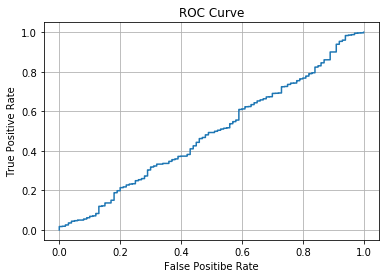

In [273]:
#AUC Score
import matplotlib.pyplot as plt

def plotROC(dfcolumn):
    
    L = dfcolumn
    Thresholds_sorted = sorted(list(set(L)))

    TPR = []
    FPR = []

    for threshold in Thresholds_sorted:
        df['y_pred'] = dfcolumn.apply(lambda x:0 if x<threshold else 1)
        
        #Calling Confusionmatrix function
        TP,TN,FP,FN = computeCM(df.values)
        
        #Calculating TPR and FPR for each threshold
        if (TP+FN) == 0 and (FP+TN) == 0:
            TruePositiveRate = 0
            TruePositiveRate = 0
            
        elif (TP+FN) == 0:
            TruePositiveRate = 0
            FalsePositiveRate = FP/(FP+TN)
            
        elif (FP+TN) == 0:
            FalsePositiveRate = 0
            TruePositiveRate = TP/(TP+FN)

        else:
            TruePositiveRate = TP/(TP+FN)
            FalsePositiveRate = FP/(FP+TN)

        TPR.append(TruePositiveRate)
        FPR.append(FalsePositiveRate)
        
    return TPR,FPR

TPR,FPR = plotROC(df['proba'])

plt.plot(FPR,TPR)
plt.title("ROC Curve")
plt.xlabel('False Positibe Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

In [274]:
#AUC score
AUC = np.trapz(TPR, FPR)
print(f"AUC score: {abs(AUC)}")

AUC score: 0.48829900000000004


<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [275]:
# write your code here
df = pd.read_csv('5_b.csv')

In [276]:
df.head(5)

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [277]:
x,y = noOf1s0s(df,'y')

print(f"Total No of rows & columns: {df.shape}")
print(f"No of 1's: {len(x)}")
print(f"No of 0's: {len(y)}")

Total No of rows & columns: (10100, 2)
No of 1's: 100
No of 0's: 10000


In [278]:
#Deriving the class labels from prabability score
df['y_pred'] = df['proba'].apply(lambda x:0 if x<0.5 else 1)

In [279]:
df.head(5)

,y,proba,y_pred
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


In [280]:
#After Deriving the class
x,y = noOf1s0s(df,'y_pred')

print(f"Total No of rows & columns: {df.shape}")
print(f"No of 1's: {len(x)}")
print(f"No of 0's: {len(y)}")

Total No of rows & columns: (10100, 3)
No of 1's: 294
No of 0's: 9806


In [281]:
#Confusion Matrix

TP,TN,FP,FN = computeCM(df.values)

print(f"True  Positive(TP):{TP}")
print(f"True  Negative(TN):{TN}")
print(f"False Positive(FP):{FP}")
print(f"False Negative(FN):{FN}")

True  Positive(TP):55
True  Negative(TN):9761
False Positive(FP):239
False Negative(FN):45


In [282]:
#F1-Score
Precesion = TP/(TP+FP)    #Out of total positive that my model predicted how many are actual positive
Recall = TP/(TP+FN)       #Out of total posistive how many my model predicted posistive
F1_Score = 2*((Precesion*Recall)/(Precesion+Recall))

print(f"Precesion: {Precesion}")
print(f"Recall: {Recall}")
print(f"F1_Score: {F1_Score}")

Precesion: 0.1870748299319728
Recall: 0.55
F1_Score: 0.2791878172588833


In [283]:
#Accuracy
Accuracy = (TP+TN)/(TP+TN+FP+FN)
print(f"Accuracy: {(Accuracy*100):.2f}%")

Accuracy: 97.19%


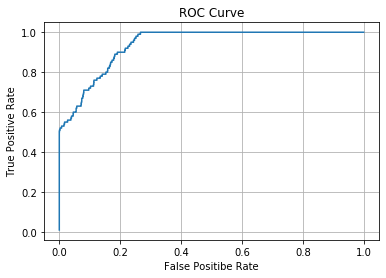

In [284]:
#AUC Score

TPR,FPR = plotROC(df['proba'])

plt.plot(FPR,TPR)
plt.title("ROC Curve")
plt.xlabel('False Positibe Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

In [286]:
#AUC score
AUC = np.trapz(TPR, FPR)
print(f"AUC score: {abs(AUC)}")

AUC score: 0.937757


<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [287]:
# write your code here
df = pd.read_csv('5_c.csv')

In [288]:
df.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [289]:
x,y = noOf1s0s(df,'y')

print(f"Total No of rows & columns: {df.shape}")
print(f"No of 1's: {len(x)}")
print(f"No of 0's: {len(y)}")

Total No of rows & columns: (2852, 2)
No of 1's: 1047
No of 0's: 1805


In [290]:
#import matplotlib.pyplot as plt
L = df['prob']
Thresholds_sorted = sorted(list(set(L)))
#Thresholds_sorted = list(set(L))

A_dict = {}

for threshold in Thresholds_sorted:
    df['y_pred'] = df['prob'].apply(lambda x:0 if x<threshold else 1)
    
    #Calling Confusionmatrix function
    TP,TN,FP,FN = computeCM(df.values)
    
    𝐴 = (500*FN) + (100*FP)
    A_dict[A]= threshold


In [292]:
dictL = min([i[0] for i in A_dict.items()])
print(f"The best threshold of probability which gives lowest values of metric A: {A_dict[dictL]}")
print(f"A value for best Threshold: {dictL}")

The best threshold of probability which gives lowest values of metric A: 0.2300390278970873
A value for best Threshold: 141000


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [293]:
df = pd.read_csv('5_d.csv')

In [294]:
df.head(5)

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [297]:
#Mean Square Error
MSE = 0
count = 0
for row in df.values:
    MSE = MSE + (row[0]-row[1])**2
    count += 1
    
print(f"Mean Squared Error: {MSE/count}")

Mean Squared Error: 177.16569974554707


In [304]:
#MAPE (Mean absolute percentage Error)
err = 0
mape = 0
y_avg = sum(df['y'])/(df['y'].count())

for row in df.values:
    err = abs(row[0]-row[1])
    mape += err/y_avg
    
MAPE = mape/(df['y'].count())
print(f"Mean absolute percentage Error: {MAPE}")

Mean absolute percentage Error: 0.12912029940096315


In [306]:
#R**2 Error
SStotal = 0
SSres = 0
y_avg = sum(df['y'])/(df['y'].count())
for row in df.values:
    SStotal += (row[0]-y_avg)**2
    SSres += (row[0]-row[1])**2
    
Rsqr =  1-(SSres/SStotal)
print(f"R squared value: {Rsqr}")   

R squared value: 0.9563582786990964
